In [54]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from datetime import timedelta

import pg8000
conn = pg8000.connect(host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com', database="training", port=5432, user='dot_student', password='qgis')

In [55]:
cursor = conn.cursor()
statement = "SELECT * FROM information_schema.columns WHERE table_name= 'noise_311'"
cursor.execute(statement)
column_names = []
for row in cursor.fetchall():
    column_names.append(row[3])
print(column_names)

['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name', 'complaint_type', 'descriptor', 'location_type', 'incident_zip', 'incident_address', 'street_name', 'cross_street_1', 'cross_street_2', 'intersection_street_1', 'intersection_street_2', 'address_type', 'city', 'landmark', 'facility_type', 'status', 'due_date', 'resolution_description', 'resolution_action_updated_date', 'community_board', 'borough', 'x_coordinate', 'y_coordinate', 'park_facility_name', 'park_borough', 'school_name', 'school_number', 'school_region', 'school_code', 'school_phone_number', 'school_address', 'school_city', 'school_state', 'school_zip', 'school_not_found', 'school_or_citywide_complaint', 'vehicle_type', 'taxi_company_borough', 'taxi_pick_up_location', 'bridge_highway_name', 'bridge_highway_direction', 'road_ramp', 'bridge_highway_segment', 'garage_lot_name', 'ferry_direction', 'ferry_terminal_name', 'latitude', 'longitude', 'location']


In [56]:
statement = "SELECT created_date, closed_date, agency, complaint_type FROM noise_311"
cursor.execute(statement)
complaint_data = []
for row in cursor:
    complaint_data.append(row)

In [77]:
df = pd.DataFrame(complaint_data)
df.columns = ['created date', 'closed date', 'agency', 'complaint type']
df.head(3)

,created date,closed date,agency,complaint type
0,2014-08-31 23:59:00,2014-09-01 03:52:00,NYPD,Noise - Street/Sidewalk
1,2014-08-31 23:56:00,2014-09-01 06:17:00,NYPD,Noise - Vehicle
2,2014-08-31 23:54:00,2014-09-01 01:29:00,NYPD,Noise - Commercial


In [60]:
pd.value_counts(df['complaint type'].values, sort=True)

Noise - Street/Sidewalk     16337
Noise - Commercial           9557
Noise - Vehicle              5816
Noise                        2825
Noise - Park                 2380
Noise - House of Worship      358
Noise - Helicopter            311
Collection Truck Noise         31
dtype: int64

In [62]:
date1 = df['closed date']
date2 = df['created date']
timeopen = date1 - date2
df1 = pd.DataFrame(timeopen)
df1.columns = ['Time Taken']
df1.describe()

,Time Taken
count,37615
mean,0 days 07:44:22.532500
std,1 days 12:06:09.012799
min,0 days 00:01:00
25%,0 days 00:54:00
50%,0 days 02:02:00
75%,0 days 04:15:00
max,48 days 05:45:00


In [63]:
timeopen.astype('timedelta64[h]')
a = (timeopen / pd.Timedelta(hours=1)).dropna()
plottable_dates = pd.DataFrame(a)
plottable_dates.describe()

,0
count,37615.000000
mean,7.739592
std,36.102504
min,0.016667
25%,0.900000
50%,2.033333
75%,4.250000
max,1157.750000


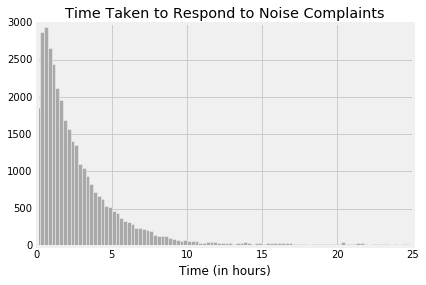

In [78]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
n, bins, patches = ax.hist(plottable_dates, bins=100, range=(0, 25), histtype='bar')

for patch in patches:
    patch.set_facecolor('darkgrey')

plt.title('Time Taken to Respond to Noise Complaints')
plt.xlabel('Time (in hours)')

Time taken to respond to noise complaints is, overall, shorter, and there are no questionable negative times. 